# Estudi Gaussian Mixture

## Lectura fitxer students

In [1]:
import pandas as pd

In [7]:
df_students = pd.read_csv("datasets/Data Carrard.csv")
df_students = df_students.drop('id', axis = 1)

In [8]:
df_categorical = df_students[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_numerical = df_students[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

## Aplicació model

In [9]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_numerical)

# Create a PCA instance: pca
pca = PCA(n_components=0.95)

# Fit the PCA instance to the scaled samples
pca.fit(df_num_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df_num_scaled)

# Print the shape of pca_features
print("The shape of the pca is : ", pca_features.shape)

The shape of the pca is :  (886, 10)


In [12]:
n_grups = 3
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(pca_features)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\MLi\anaconda3\lib\subprocess.py", line 1479, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\MLi\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\MLi\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MLi\anaconda

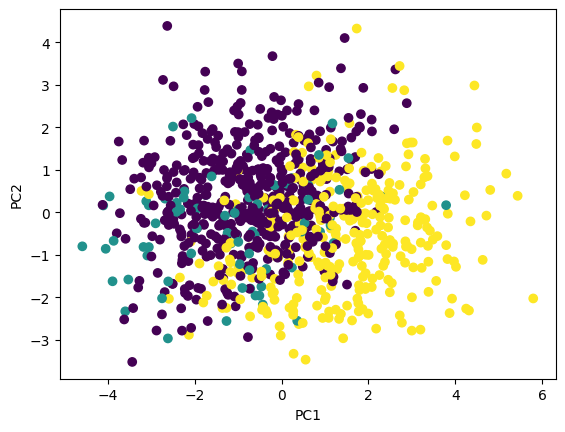

In [13]:
# scatter plot of the first two principal components
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [22]:
cluster_labels = model_gm.predict(pca_features)

In [23]:
df_clustered = df_numerical.copy() 
df_clustered['Cluster'] = cluster_labels 

In [24]:
df_clustered.head(5) 

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,Cluster
0,18,88,62,27,17,0.738095,34,61,17,13,20,0
1,26,109,55,37,22,0.690476,7,33,14,11,26,0
2,21,106,64,39,17,0.690476,25,73,24,7,23,2
3,21,101,52,33,18,0.833333,17,48,16,10,21,0
4,21,102,58,28,21,0.690476,14,46,22,14,23,2


In [25]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('Cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age        jspe   qcae_cog   qcae_aff       amsp  erec_mean  \
Cluster                                                                      
0        21.605210  104.639279  57.476954  34.246493  22.645291   0.713522   
1        28.243243  108.378378  59.689189  32.270270  25.756757   0.694015   
2        22.239617  108.667732  59.923323  36.236422  23.338658   0.736878   

              cesd     stai_t     mbi_ex     mbi_cy     mbi_ea  
Cluster                                                         
0        13.346693  39.140281  15.104208   7.931864  25.410822  
1        13.648649  37.324324  14.567568   9.324324  25.891892  
2        26.591054  50.207668  20.252396  13.680511  21.891374  


In [26]:
# Getting the number of patients in each cluster
cluster_grouped.size()

Cluster
0    499
1     74
2    313
dtype: int64

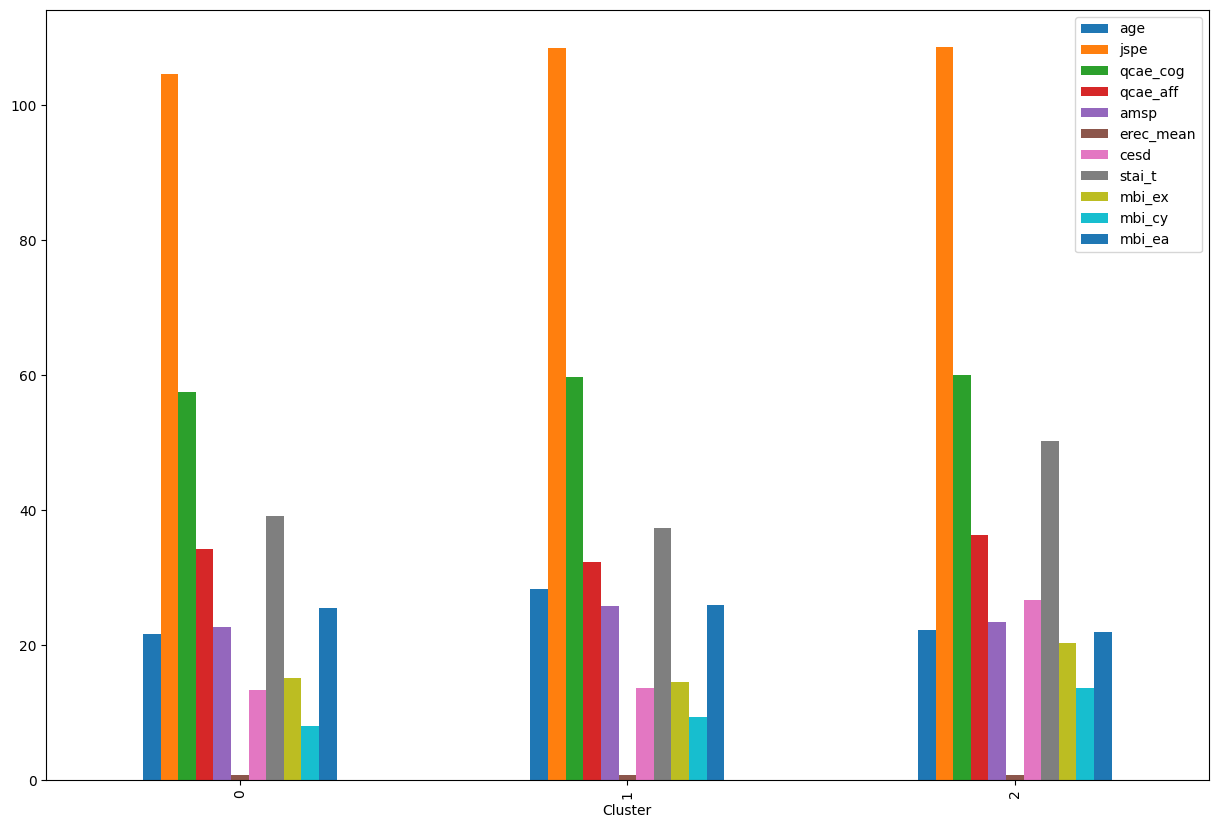

In [27]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

**Conclusions**

Per una banda, els estudiants en el clúster 2 presenten una escala d'ansietat (stai) i cinisme més alta que els altre dos grups. A més, aquest grup té més depressió, però amb més empatia.

Per l'altra, els clústers 0 i 1 tenen els atributs semblants. Tot i que el clúster 1 té més motivació pel estudis que el clúster 2.

Amb una visió global, no tenim una clara distinció entre els 3 clústers. És cert que hem trobat algunes diferències entre els clústers, però no creiem que sigui suficient. A la imatge on es veuen els clústers, es troben molt solapats.

## Machine Learning

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, cluster_labels, test_size=0.2, random_state=42) # 80% training and 20% test data sets

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8932584269662921


## Avaluació model

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91  0  3]
 [ 3 13  1]
 [11  1 55]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        94
           1       0.93      0.76      0.84        17
           2       0.93      0.82      0.87        67

    accuracy                           0.89       178
   macro avg       0.91      0.85      0.88       178
weighted avg       0.90      0.89      0.89       178

